In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. ANALYSE  

In [2]:
data_orig = pd.read_csv(r"../$ Data_base/titanic3.csv")
data = data_orig.copy()

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
### Suppression des variables moins importantes

data.drop(columns=['PassengerId', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
data.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0


In [6]:
# Statistique descriptive
data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [7]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
print(f"Taux de données manquantes : \n\n {(data.isna().sum()/data.shape[0])}")

Taux de données manquantes : 

 Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
dtype: float64


In [9]:
# Suppression des variables manquantes ( Attention, nous modifions la réalité !)
data.dropna(axis=0, inplace=True)

In [10]:
### Statistique descriptive
data.describe()

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


Pclass
3    355
1    186
2    173
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

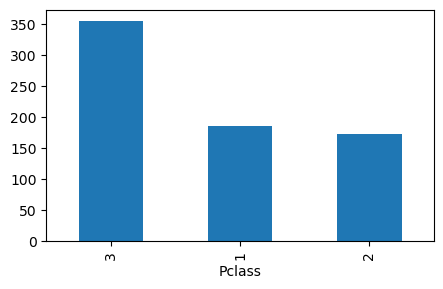

In [11]:
print(data['Pclass'].value_counts())
data['Pclass'].value_counts().plot.bar(figsize=(5,3))

<Axes: >

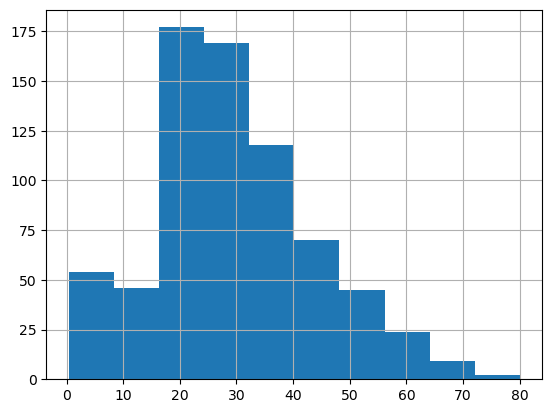

In [12]:
data['Age'].hist()

<Axes: >

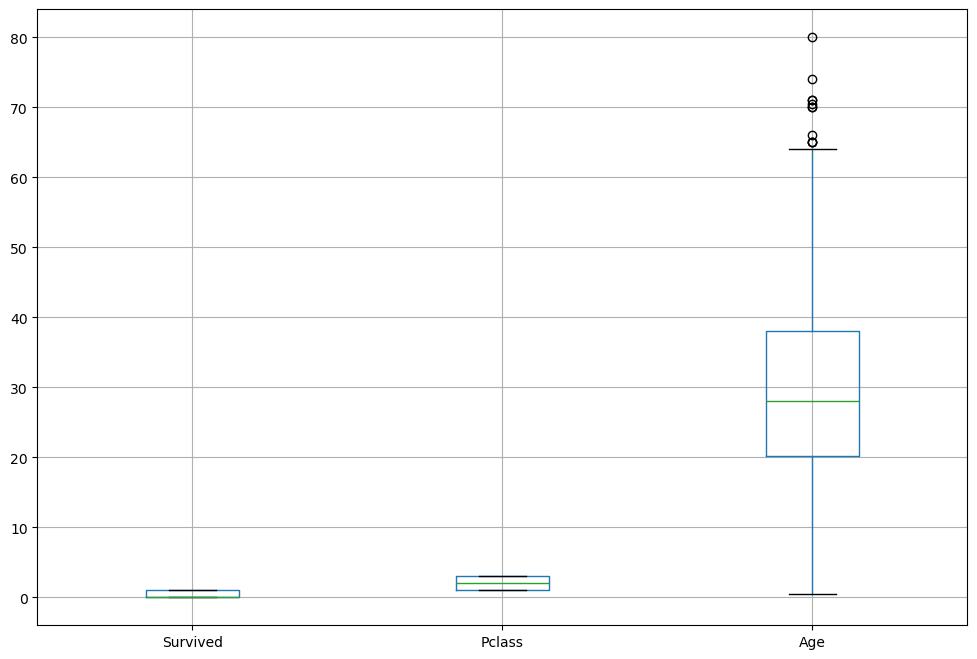

In [13]:
data.boxplot(figsize=(12,8))

In [14]:
data.groupby(['Sex','Pclass']).mean()

Survived        Age
Sex    Pclass                     
female 1       0.964706  34.611765
       2       0.918919  28.722973
       3       0.460784  21.750000
male   1       0.396040  41.281386
       2       0.151515  30.740707
       3       0.150198  26.507589

### Ce qu'on peut retenir de cette analyse
- environ 20% des passagers n'avaient pas donnés leur âge ;
- sur 891 passagers, seulement 38% soit 342 avaient surveçus ;
- les passagers avaient majoritairement entre 20-38 ans ;
- une femme qui voyageait en prémière class a plus de chance de suivivre que celle qui voyageait en troisième class.
- un homme qui voyageait en troisième class a moins de chance de suivivre que celle qui voyageait en prémière class.

### 2. Modélisation

In [15]:
### Prétraitement des données

In [16]:
df = data.copy()

In [17]:
df['Sex'] = df['Sex'].astype('category').cat.codes

In [18]:
#on pouvait également utiliser : df['Sex'].replace(['male','female'],[0,1], inplace=True)

In [19]:
df.head(3)

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0


In [20]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (714, 3)
y :  (714,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
### Premier model : KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors=5)

In [26]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
model.score(X_test, y_test)

0.6853146853146853

In [28]:
from sklearn.model_selection import validation_curve

In [29]:
k = np.arange(1,20) 
train_score, val_score = validation_curve(model, X_train, y_train, cv=5, param_name='n_neighbors',param_range=k)

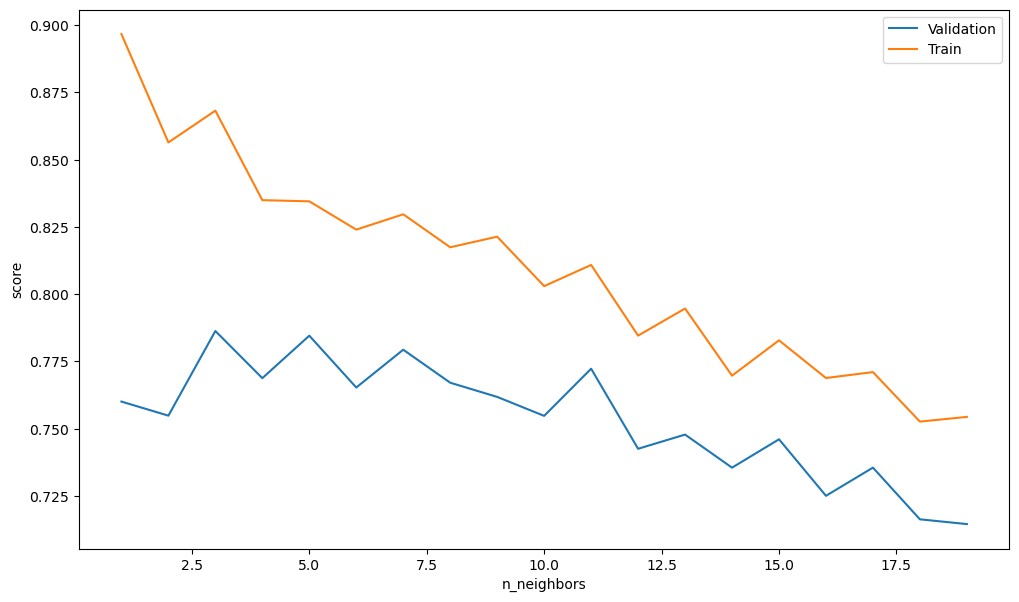

In [30]:
plt.figure(figsize=(12,7))
plt.plot(k, val_score.mean(axis=1), label="Validation")
plt.plot(k, train_score.mean(axis=1),label='Train' )
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [33]:
grid = GridSearchCV( KNeighborsClassifier(n_neighbors=12),
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1
)

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=12), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [35]:
print("Meilleurs paramètres :\n", grid.best_params_)
print()
print("Meilleure précision :\n", grid.best_score_) 

Meilleurs paramètres :
 {'metric': 'manhattan', 'p': 1, 'weights': 'distance'}

Meilleure précision :
 0.8090922959572845


In [36]:
model_final = grid.best_estimator_

In [37]:
model_final.score(X_test, y_test)

0.7412587412587412

In [38]:
### Deuxième model : RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_2 = RandomForestClassifier(random_state=17)

In [41]:
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [42]:
model_2.score(X_test, y_test)

0.7762237762237763

In [43]:
from sklearn.model_selection import learning_curve

In [44]:
N, train_score, val_score = learning_curve(model_2, X_train, y_train, train_sizes= np.linspace(0.1, 1.0,  10) , cv=5)

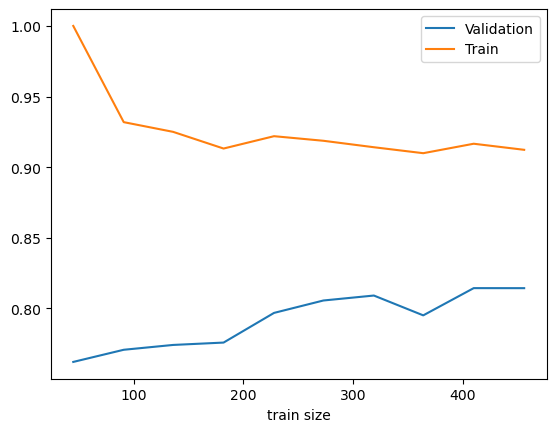

In [45]:
plt.plot(N, val_score.mean(axis=1), label="Validation")
plt.plot(N, train_score.mean(axis=1),label='Train' )
plt.xlabel("train size")
plt.legend()

### Ce qu'on peut retenir de cette modelisation
- Les modèles utilisés, KNeighborsClassifier et RandomForestClassifier ont respectivement une performance de 74% et 77% pour prédire si un individu survivrait au naufrage de Titanic en fonction de son âge, son sexe et la class dans laquelle il voyagerait.
- La courbe d'apprentissage nous montre que le modèle RandomForestClassifier est en overfiting, ce qui veut dire qu'il est necessaire de chercher plus de données !

# Prédiction 

### Une fonction qui prend l'âge, le sexe (1 pour masculin et 0 pour feminin) et la class dans laquelle une personne voyagerait et prédire si elle survivrait au naufrage de Titanic.

In [62]:
def pred_suivie(model, classe, sexe, age):
    x = np.array([classe, sexe, age])
    x = x.reshape(1, 3)
    suivie = model.predict(x)
    return "vous suivivriez" if suivie else "vous ne suivivriez pas !"

In [68]:
pred_suivie(model=model_2, classe=1, sexe=1, age=33) 

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'vous suivivriez'